In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px ## World Map

In [2]:
df=pd.read_csv("powerhouse.csv")
df.head()

,date,population
0,22-12-2021,25
1,30-12-2021,31
2,08-01-2022,36
3,10-01-2022,46
4,11-01-2022,47


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        17 non-null     object
 1   population  17 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 400.0+ bytes


In [4]:
df.isnull().sum()

date          0
population    0
dtype: int64

In [5]:
df["date"]= pd.to_datetime(df["date"])

<ipython-input-5-082167ba8dcc>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["date"]= pd.to_datetime(df["date"])


In [7]:
 !pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
 from prophet import Prophet

In [9]:
population=df.groupby('date')['population'].sum().reset_index()

In [10]:
population.rename(columns={"date":"ds","population":"y"},inplace=True)

In [11]:
model=Prophet(interval_width=0.95)

In [12]:
model.fit(population)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/ruuiaiyo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/v3xa_x49.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14678', 'data', 'file=/tmp/tmpqki2d_87/ruuiaiyo.json', 'init=/tmp/tmpqki2d_87/v3xa_x49.json', 'output', 'file=/tmp/tmpqki2d_87/prophet_modelbg5z9h5c/prophet_model-20230421055620.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:56:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:56:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

In [13]:
future_dates=model.make_future_dataframe(periods=30)

In [14]:
forecast=model.predict(future_dates)

           ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2021-12-22  32.483106   22.140485   69.054712    32.483106    32.483106   
1  2021-12-30  32.905050   18.605157   68.583946    32.905050    32.905050   
2  2022-01-26  34.329110   22.790937   71.100353    34.329110    34.329110   
3  2022-02-08  35.014769   24.419072   72.151783    35.014769    35.014769   
4  2022-02-18  35.542199   32.312242   79.656574    35.542199    35.542199   
5  2022-04-28  39.181465   27.741318   74.620581    39.181465    39.181465   
6  2022-08-01  44.192049   26.058614   72.607591    44.192049    44.192049   
7  2022-09-12  46.407254   28.374255   76.687670    46.407254    46.407254   
8  2022-09-15  46.565483   34.466011   81.955581    46.565483    46.565483   
9  2022-10-01  47.409371   22.544441   70.380497    47.409371    47.409371   
10 2022-10-26  48.727946   35.422602   84.822407    48.727946    48.727946   
11 2022-11-01  49.044404   38.238756   86.835460    49.044404   

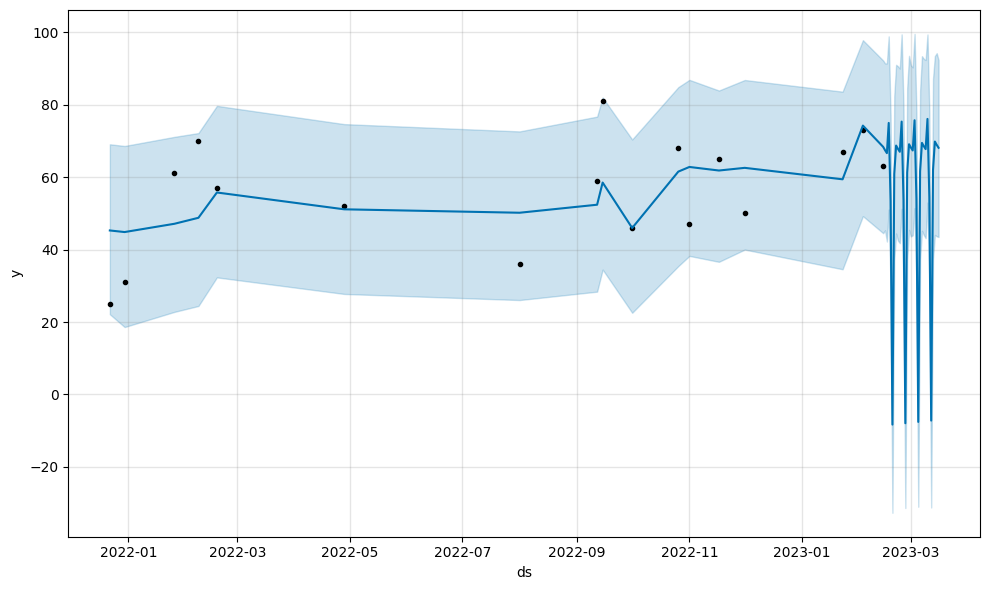

In [25]:
model.plot(forecast)
print(forecast)

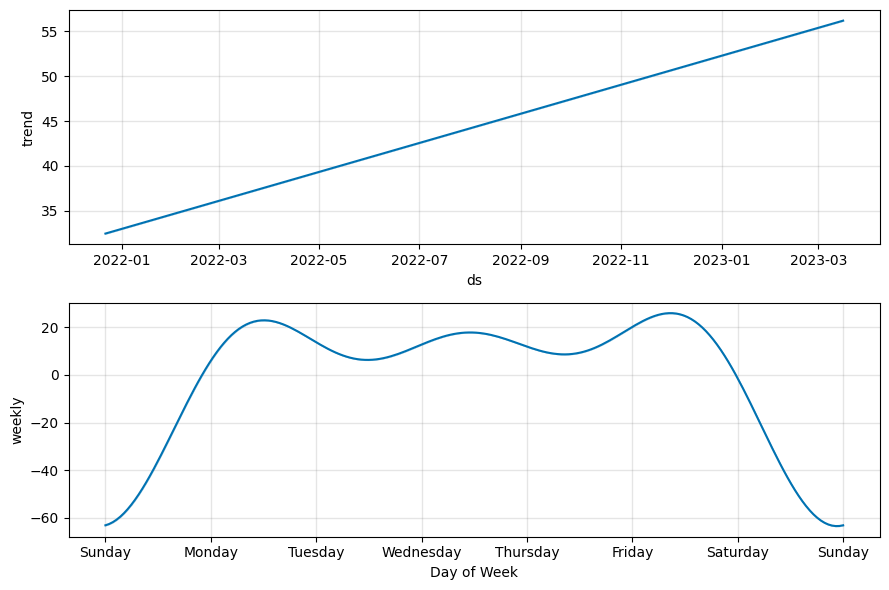

In [26]:
component=model.plot_components(forecast)

In [27]:
 model1=Prophet(interval_width=0.95)

In [28]:
 model1.fit(population)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/25f7bsug.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/ts6cxaaa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44011', 'data', 'file=/tmp/tmpqki2d_87/25f7bsug.json', 'init=/tmp/tmpqki2d_87/ts6cxaaa.json', 'output', 'file=/tmp/tmpqki2d_87/prophet_modelmeenivrq/prophet_model-20230421060031.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:00:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:00:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

In [29]:
future_dates=model1.make_future_dataframe(periods=10)

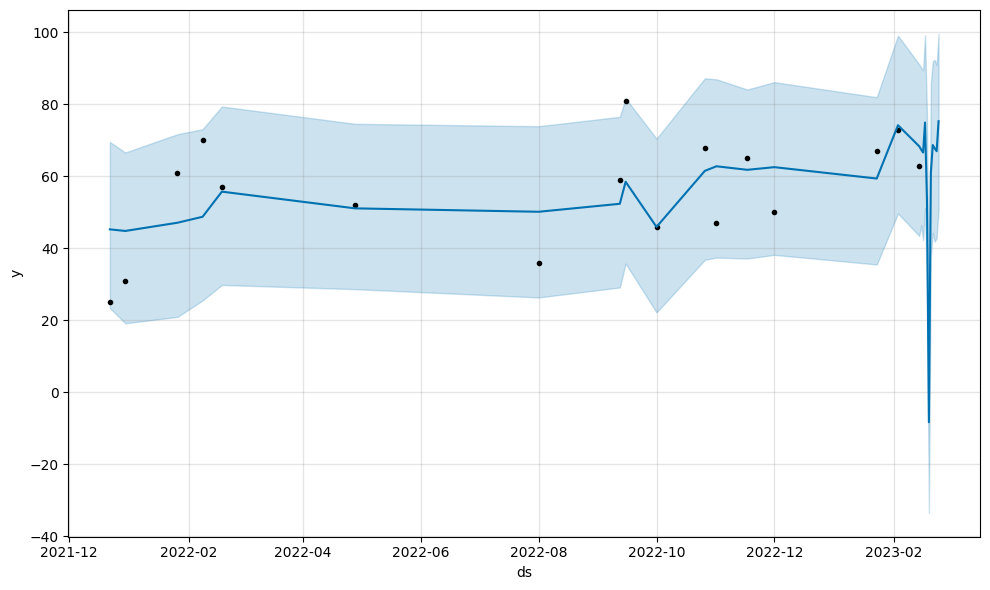

In [30]:
forecasting=model.predict(future_dates)
ploting=model.plot(forecasting)

           ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2021-12-22  32.483106   23.427342   69.557343    32.483106    32.483106   
1  2021-12-30  32.905050   19.175575   66.614659    32.905050    32.905050   
2  2022-01-26  34.329110   20.957025   71.703540    34.329110    34.329110   
3  2022-02-08  35.014769   25.519869   73.090923    35.014769    35.014769   
4  2022-02-18  35.542199   29.828010   79.390328    35.542199    35.542199   
5  2022-04-28  39.181465   28.659228   74.589306    39.181465    39.181465   
6  2022-08-01  44.192049   26.354295   73.923902    44.192049    44.192049   
7  2022-09-12  46.407254   29.130121   76.537420    46.407254    46.407254   
8  2022-09-15  46.565483   35.759382   81.649406    46.565483    46.565483   
9  2022-10-01  47.409371   22.199491   70.465930    47.409371    47.409371   
10 2022-10-26  48.727946   36.802408   87.222719    48.727946    48.727946   
11 2022-11-01  49.044404   37.432912   86.949841    49.044404   

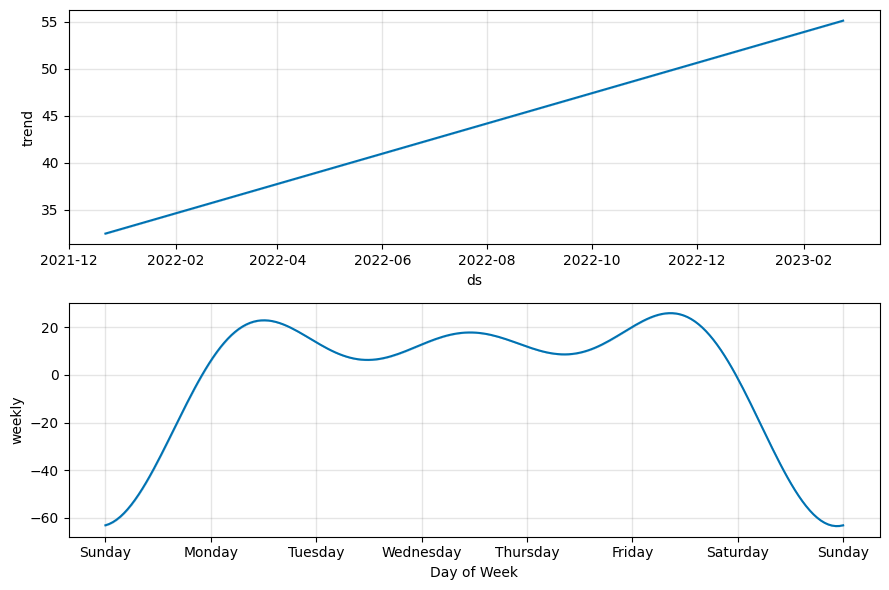

In [31]:
week=model1.plot_components(forecasting)
print(forecasting)